In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from keras import layers
from keras.models import Model

In [ ]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data.head(15)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [ ]:
data = data.fillna(method="ffill")
data.head(50)

<ipython-input-6-59daa018a411>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 16248
Unique tags in corpus: 17


In [ ]:
words=list(data['Word'].unique())
words.append("ENDPAD")
num_words = len(words)
tags=list(data['Tag'].unique())
num_tags = len(tags)

In [ ]:
print("Unique tags are:", tags)

Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences
len(sentences)

<ipython-input-10-ec4b8e38ba61>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence #").apply(agg_func)


9968

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
X1 = [[word2idx[w[0]] for w in s] for s in sentences]

In [ ]:
max_len = 100
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [ ]:
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]

In [ ]:
y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [ ]:
X_train[0]
y_train[0]

array([5, 6, 6, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
input_word = layers.Input(shape=(max_len,))
embedding_layer= layers.Embedding(input_dim=num_words,output_dim=50,input_length=max_len)(input_word)
dropout_layer=layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm=layers.Bidirectional(layers.LSTM(units=100,return_sequences=True,recurrent_dropout=0.1))(dropout_layer)
output=layers.TimeDistributed(layers.Dense(num_tags,activation="softmax"))(bidirectional_lstm)
model = Model(input_word, output)
print("Name:ARUN KUMAR SUKDEV CHAVAN")
print("Reg.No:212222230013")
model.summary()

Name:ARUN KUMAR SUKDEV CHAVAN
Reg.No:212222230013


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 50)             │         812,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 200)            │         120,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 100, 17)             │           3,417 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 936,667 (3.57 MB)

 Trainable params: 936,667 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=30,
    epochs=3,
)

Epoch 1/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 78s 292ms/step - accuracy: 0.9698 - loss: 0.1067 - val_accuracy: 0.9745 - val_loss: 0.0804
Epoch 2/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 73s 275ms/step - accuracy: 0.9778 - loss: 0.0700 - val_accuracy: 0.9836 - val_loss: 0.0589
Epoch 3/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 83s 278ms/step - accuracy: 0.9871 - loss: 0.0467 - val_accuracy: 0.9879 - val_loss: 0.0434


In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

Name:ARUN KUMAR SUKDEV CHAVAN
Reg.No:212222230013


<Axes: >

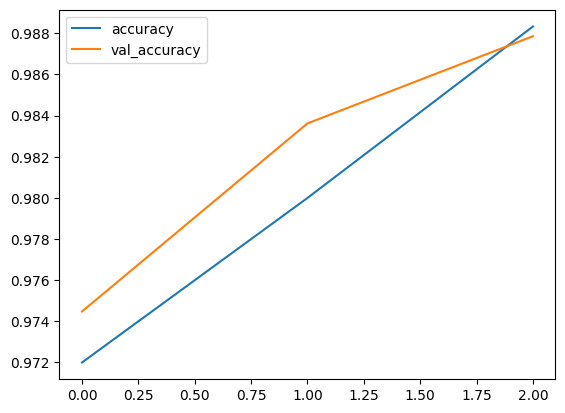

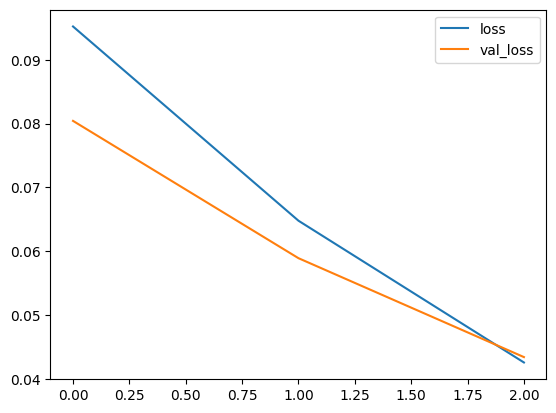

In [25]:
print("Name:ARUN KUMAR SUKDEV CHAVAN")
print("Reg.No:212222230013")
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [26]:
print("Name:ARUN KUMAR SUKDEV CHAVAN")
print("Reg.No:212222230013")
i = 25
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Name:ARUN KUMAR SUKDEV CHAVAN
Reg.No:212222230013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Word           True 	 Pred

------------------------------
Cindy          B-per	B-per
Sheehan        I-per	I-per
came           O	O
to             O	O
Crawford       B-geo	B-geo
a              O	O
week           O	O
ago            O	O
demanding      O	O
to             O	O
talk           O	O
to             O	O
Mr.            B-per	B-per
Bush           I-per	I-per
about          O	O
the            O	O
death          O	O
of             O	O
her            O	O
son            O	O
and            O	O
the            O	O
rationale      O	O
behind         O	O
the            O	O
Iraq           B-geo	B-geo
conflict       O	O
.              O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory          O	O
Glory  